## Student Performance Contributing Factors

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("StudentPerformanceFactors.csv")
# to dispaly first five rows of data
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
print("More information of data:\n",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
print("Summary of numerical columns:\n",data.describe())

Summary of numerical columns:
        Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%        

In [5]:
# Checking the null values in a data
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
# There is some missing values in columns Teacher_Quality, Parental_education_Level, and Distance_from_Home 
# by using simple imputer, I replace null values
from sklearn.impute import SimpleImputer
# If you want to impute categorical columns (e.g., with the most frequent value)
imputer_cat = SimpleImputer(strategy='most_frequent')
data[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']] = imputer_cat.fit_transform(data[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']])
# Check if there are any missing values left
print(data.isnull().sum())


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


### The number of hours studied per week correlate with the final exam score?

In [7]:
study_exam=data[['Hours_Studied','Exam_Score','Gender']]
study_exam.head(1)

,Hours_Studied,Exam_Score,Gender
0,23,67,Male


In [8]:
conditions=[
    (study_exam['Exam_Score']>=90),
    (study_exam['Exam_Score']>=80) & (study_exam['Exam_Score']<90),
    (study_exam['Exam_Score']>=70) & (study_exam['Exam_Score']<80),
    (study_exam['Exam_Score']>=60) & (study_exam['Exam_Score']<70),
    (study_exam['Exam_Score']>=50) & (study_exam['Exam_Score']<60),
    
]

grades=['O','A','B','C','Passed']

study_exam['grade']=np.select(conditions,grades)

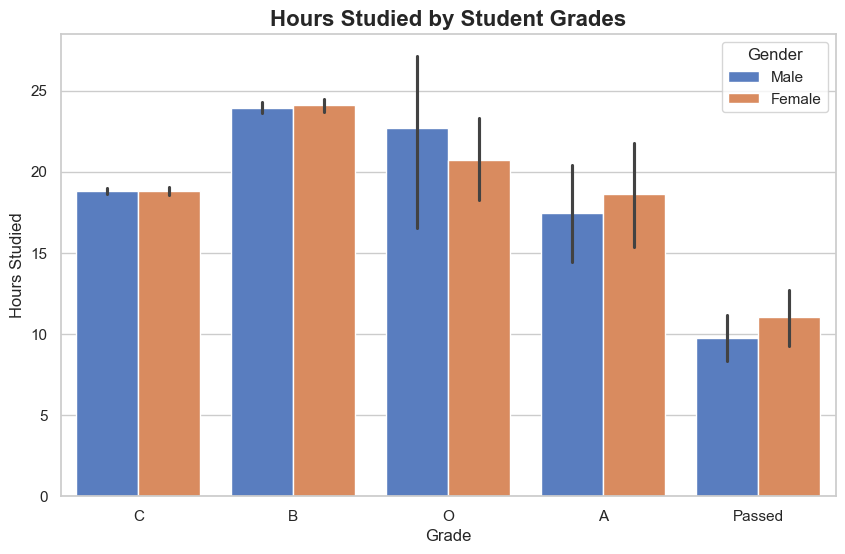

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  
sns.barplot(data=study_exam, x='grade', y='Hours_Studied', hue='Gender', palette='muted')
plt.title("Hours Studied by Student Grades", fontsize=16, fontweight='bold')
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Hours Studied", fontsize=12)
plt.show()

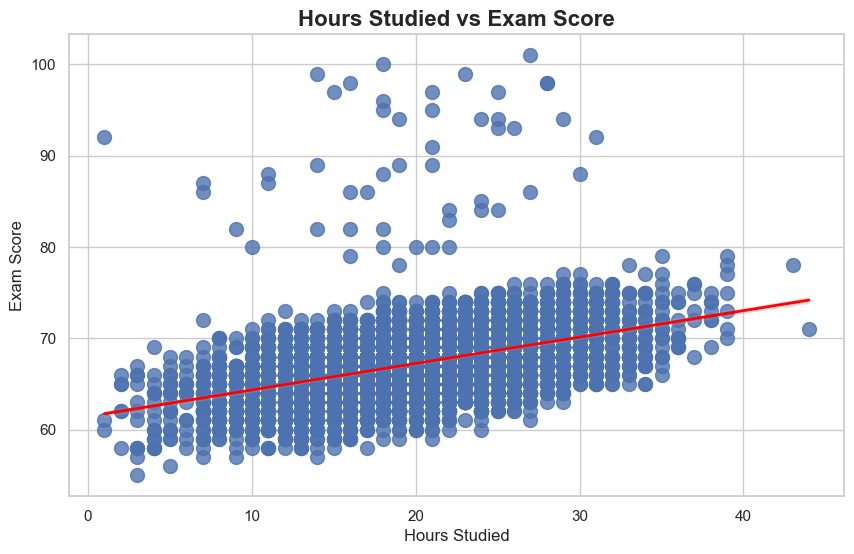

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='Hours_Studied', y='Exam_Score', data=data, scatter_kws={'s': 100}, line_kws={'color': 'red', 'lw': 2})
plt.title('Hours Studied vs Exam Score', fontsize=16, fontweight='bold')
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.show()

Possible Statistical Information: The mean and variance of both study hours and exam scores. Correlation can be inferred from the scatter plot, and skewness can help identify any outliers or asymmetries.

### Attendance is increased then marks also increased

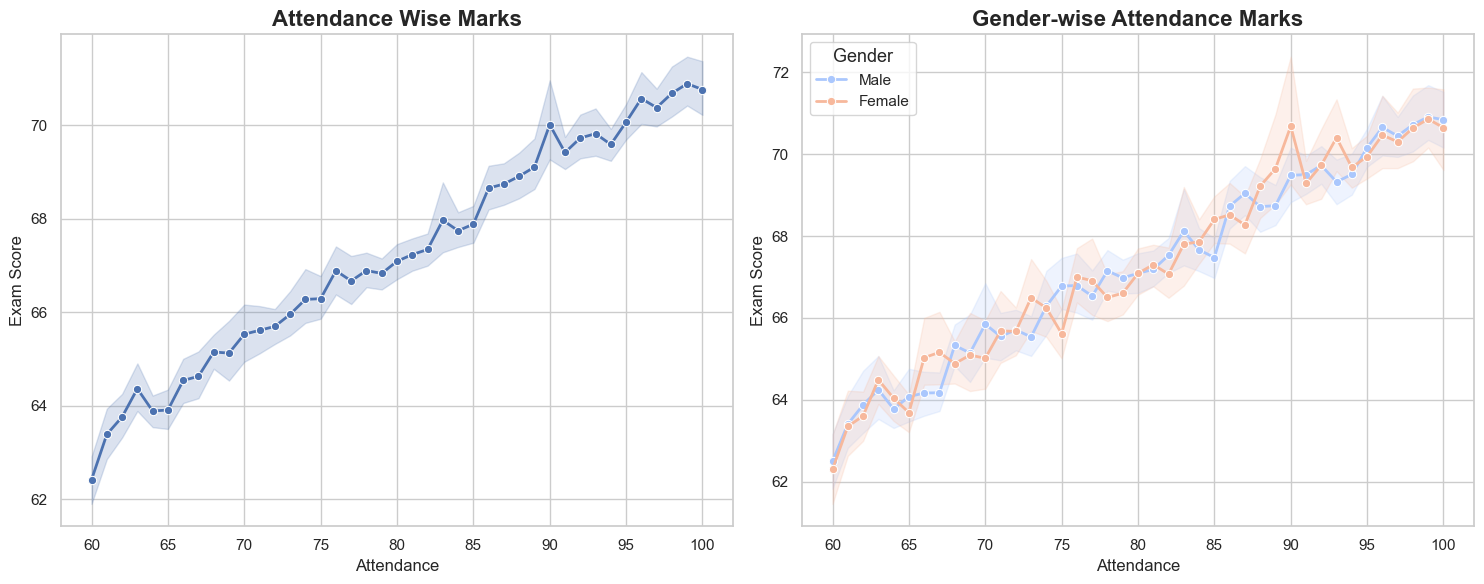

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))  # Increase the figure size for better readability
# First subplot: Attendance vs Exam Score
plt.subplot(1, 2, 1)
sns.lineplot(data, x='Attendance', y='Exam_Score', color='b', marker='o', linewidth=2, markersize=6)
plt.title("Attendance Wise Marks", fontsize=16, fontweight='bold')
plt.xlabel('Attendance', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True)

# Second subplot: Attendance vs Exam Score by Gender
plt.subplot(1, 2, 2)
sns.lineplot(data,x='Attendance', y='Exam_Score', hue='Gender', palette='coolwarm', marker='o', linewidth=2, markersize=6)
plt.title("Gender-wise Attendance Marks", fontsize=16, fontweight='bold')
plt.xlabel('Attendance', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend(title='Gender', title_fontsize=13, loc='upper left', fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()

### The average number of sleep hours per night influence exam performance?

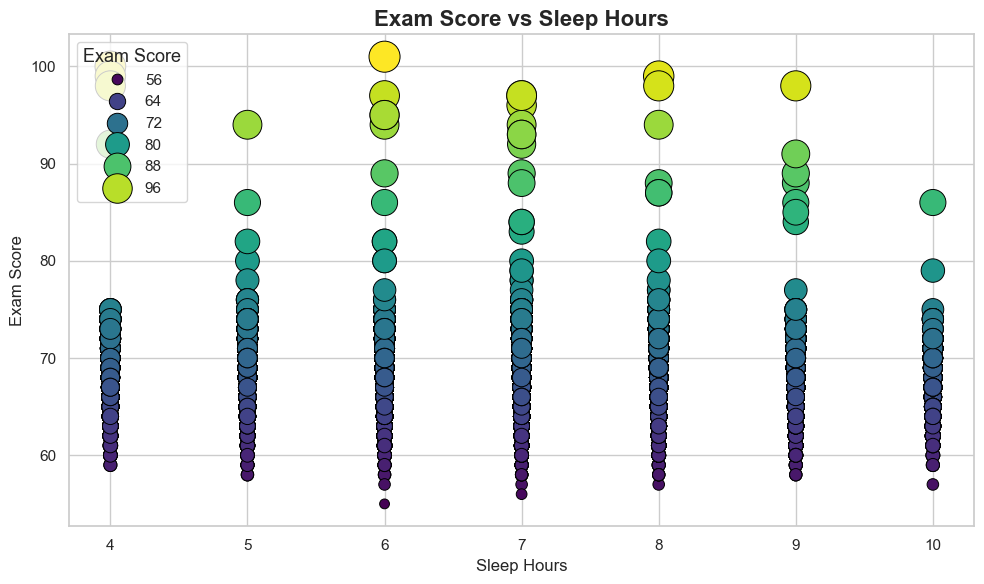

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(data, 
                x='Sleep_Hours', 
                y='Exam_Score', 
                size='Exam_Score', 
                hue='Exam_Score', 
                palette='viridis',  
                sizes=(50, 500),    
                marker='o',         
                edgecolor='black',  
                linewidth=0.7)      

plt.title("Exam Score vs Sleep Hours", fontsize=16, fontweight='bold')
plt.xlabel("Sleep Hours", fontsize=12)
plt.ylabel("Exam Score", fontsize=12)
plt.legend(title='Exam Score', title_fontsize=13, loc='upper left', fontsize=11)
plt.tight_layout()
plt.show()

### Family income and parental education level impact the student's exam scores

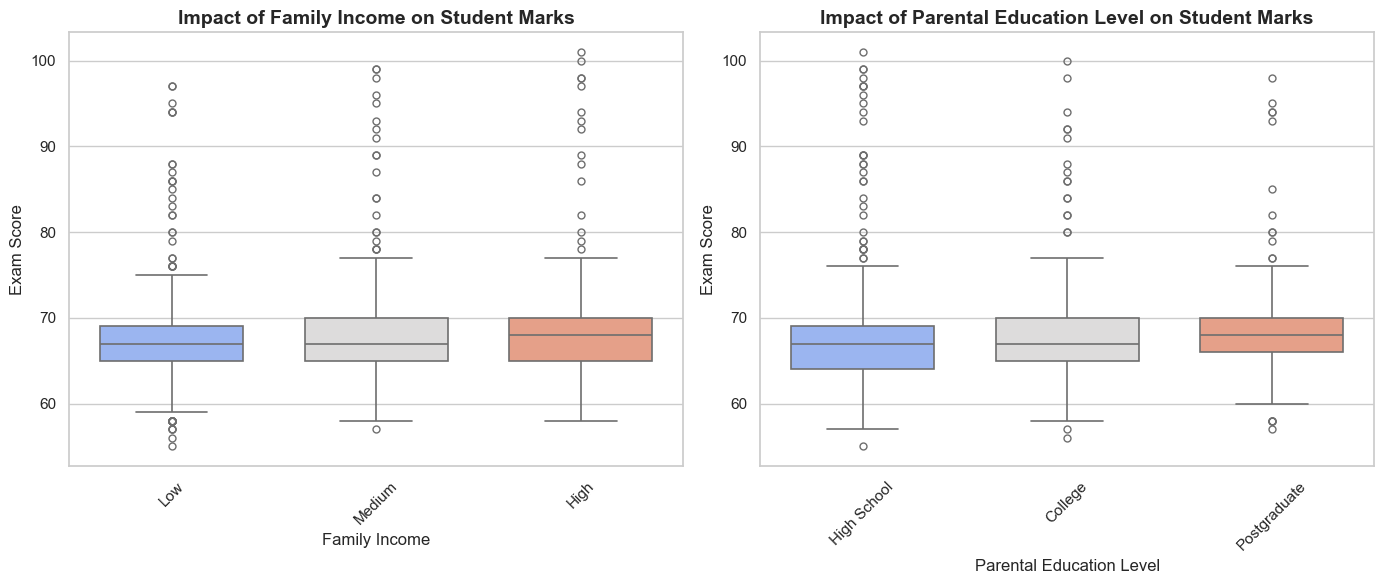

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data, 
            x='Family_Income', 
            y='Exam_Score', 
            hue='Family_Income', 
            palette='coolwarm',  
            width=0.7,          
            fliersize=5,         
            linewidth=1.2)       
plt.title("Impact of Family Income on Student Marks", fontsize=14, fontweight='bold')
plt.xlabel("Family Income", fontsize=12)
plt.ylabel("Exam Score", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot 2: Parental Education Level vs Exam Score
plt.subplot(1, 2, 2)
sns.boxplot(data, 
            x='Parental_Education_Level', 
            y='Exam_Score', 
            hue='Parental_Education_Level', 
            palette='coolwarm', 
            width=0.7,           
            fliersize=5,         
            linewidth=1.2)       
plt.title("Impact of Parental Education Level on Student Marks", fontsize=14, fontweight='bold')
plt.xlabel("Parental Education Level", fontsize=12)
plt.ylabel("Exam Score", fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

### private school students perform better in exams than public school students

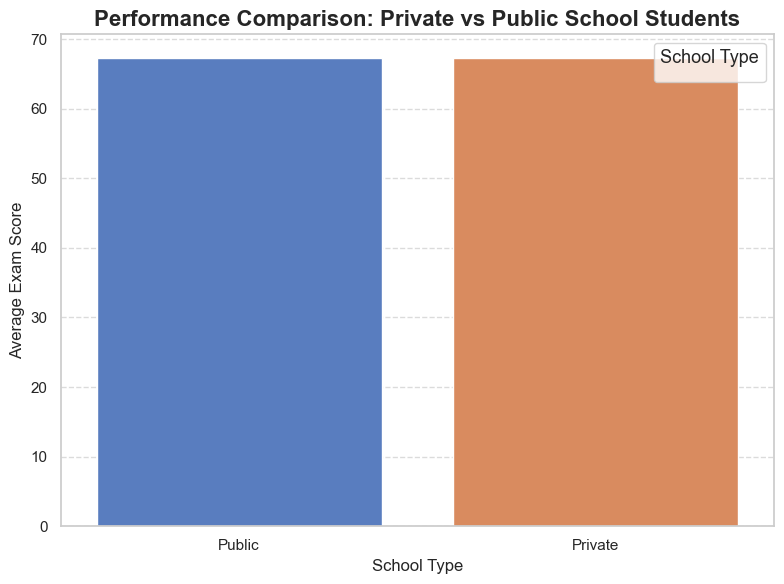

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))  
sns.barplot(data, 
            x='School_Type', 
            y='Exam_Score', 
            hue='School_Type', 
            palette='muted',     
            ci=None)            
plt.title("Performance Comparison: Private vs Public School Students", fontsize=16, fontweight='bold')
plt.xlabel("School Type", fontsize=12)
plt.ylabel("Average Exam Score", fontsize=12)
plt.legend(title="School Type", fontsize=12, title_fontsize='13', loc='upper right')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

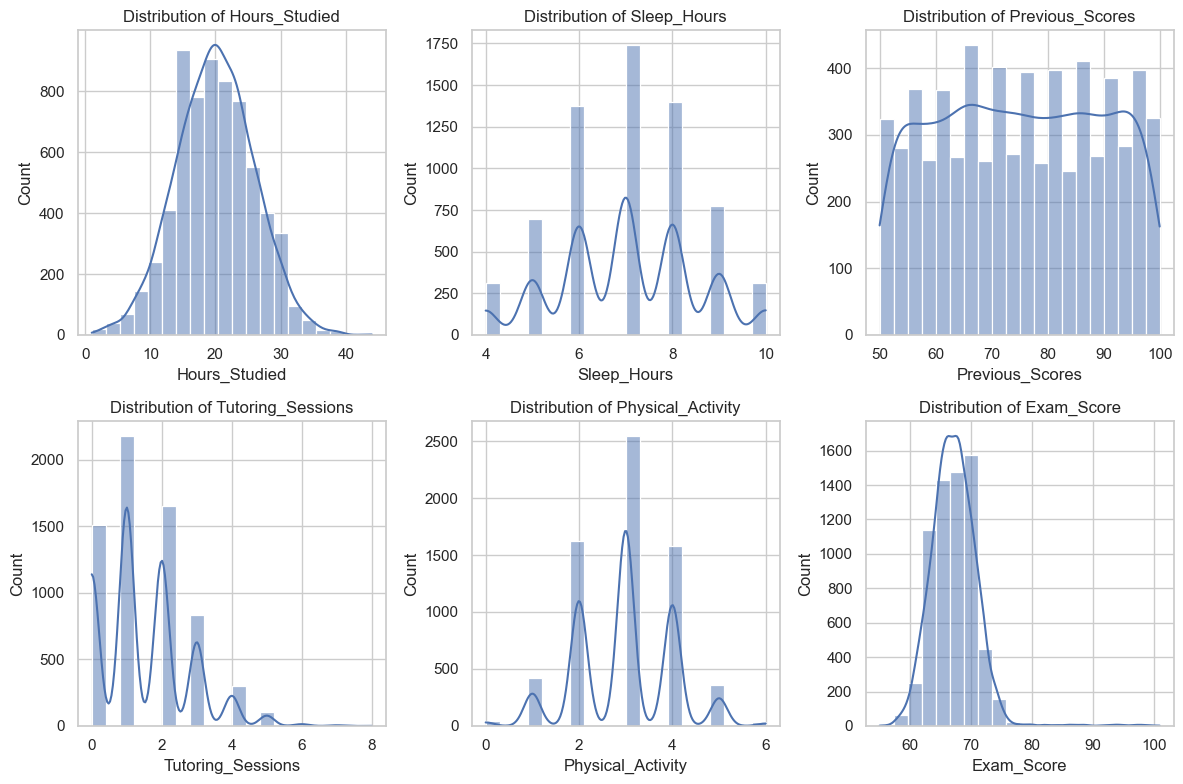

In [15]:
# Plotting histograms for numerical columns
numerical_cols = ['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

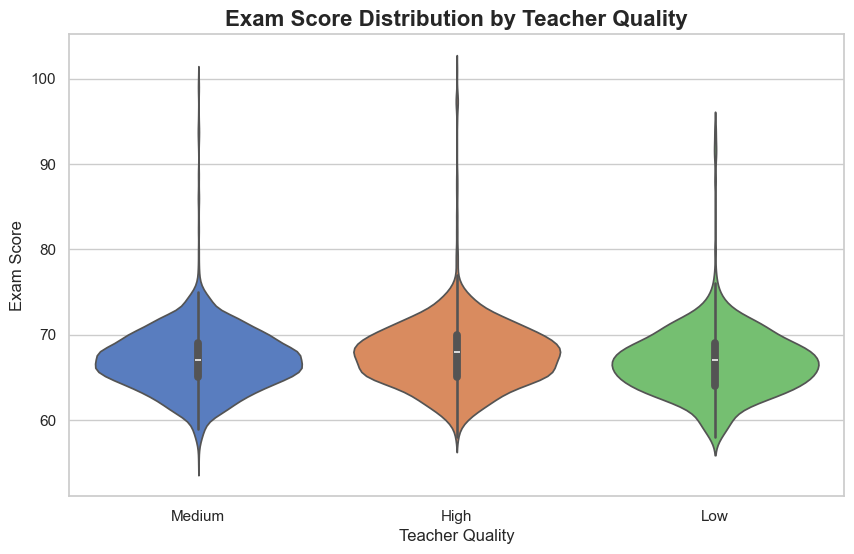

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Teacher_Quality', y='Exam_Score', palette='muted')
plt.title('Exam Score Distribution by Teacher Quality', fontsize=16, fontweight='bold')
plt.xlabel('Teacher Quality', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.show()

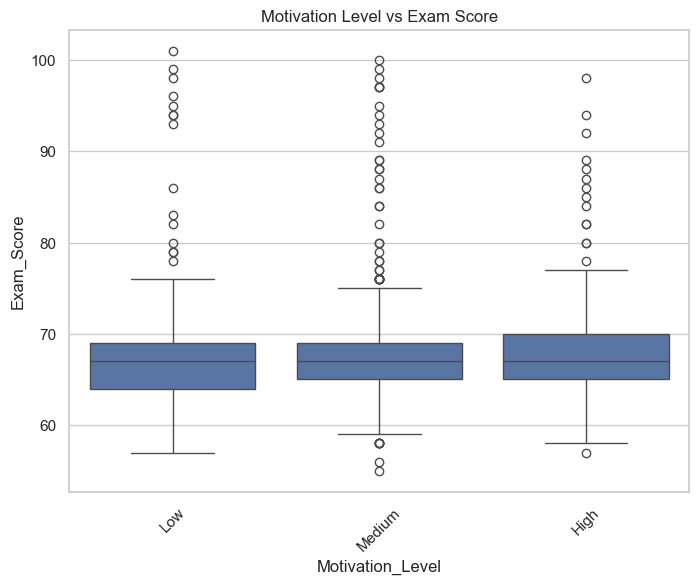

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Motivation_Level'], y=data['Exam_Score'])
plt.title('Motivation Level vs Exam Score')
plt.xticks(rotation=45)
plt.show()

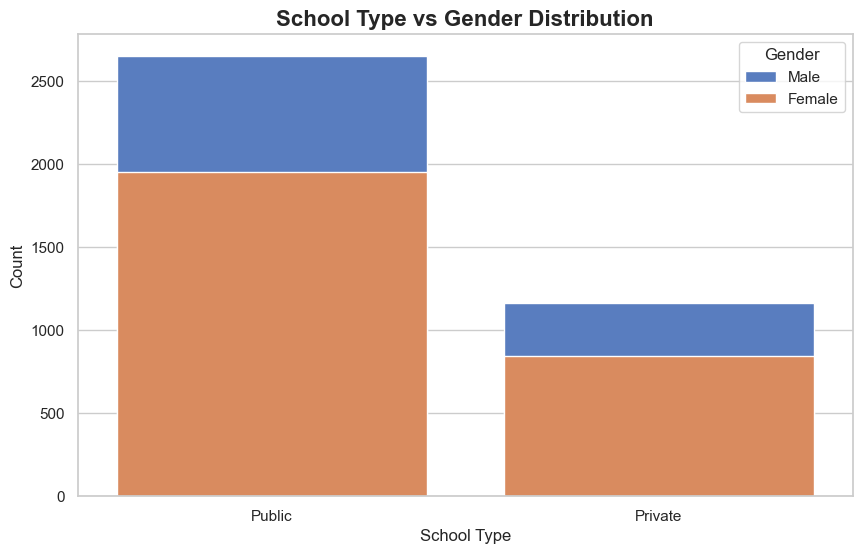

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='School_Type', hue='Gender', palette='muted', dodge=False)
plt.title('School Type vs Gender Distribution', fontsize=16, fontweight='bold')
plt.xlabel('School Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

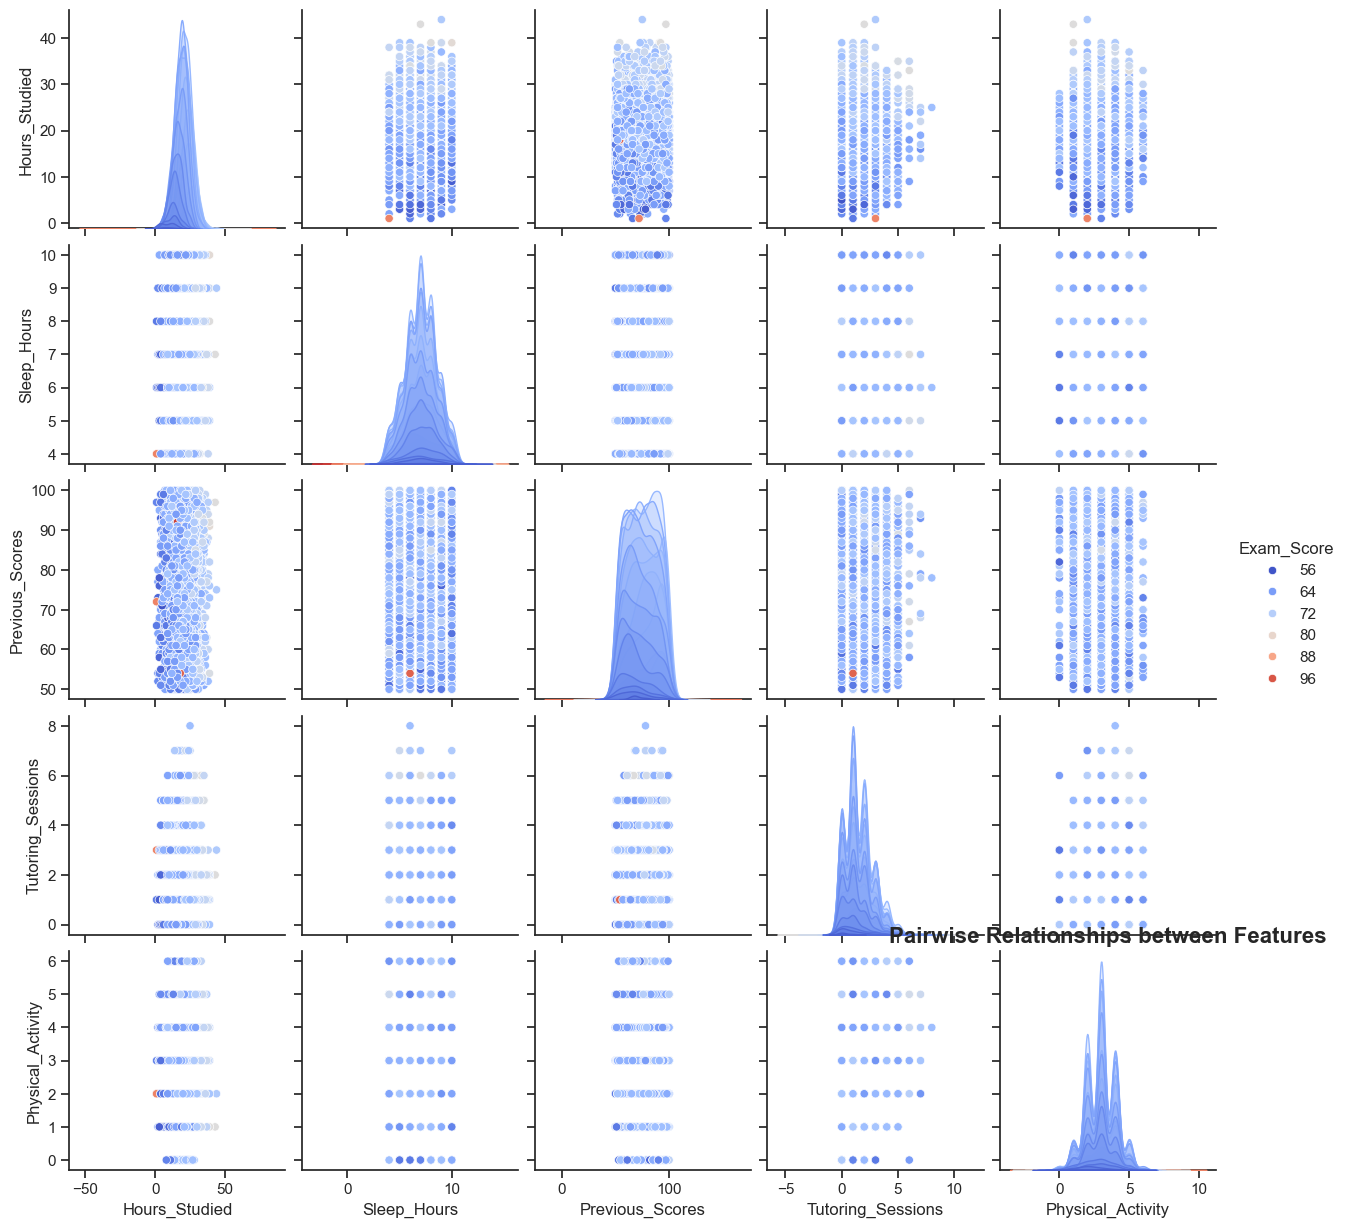

In [19]:
sns.set(style="ticks")
numerical_data = data[['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']]
sns.pairplot(numerical_data, hue="Exam_Score", palette='coolwarm', markers='o')
plt.title('Pairwise Relationships between Features', fontsize=16, fontweight='bold')
plt.show()


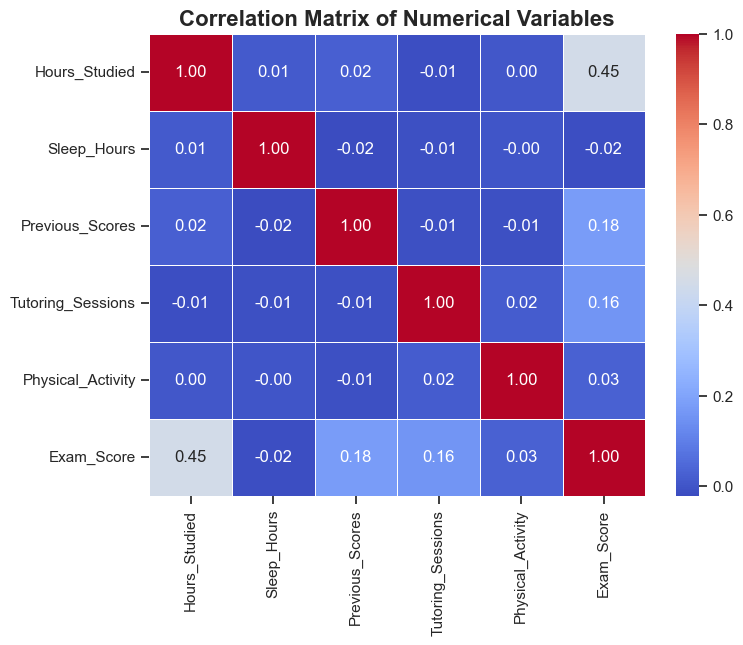

In [20]:
corr = data[['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold')
plt.show()
